In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = "D://My Folder//Forage//British Airways//data//customer_booking_cleaned.csv"
data = pd.read_csv(file_path)

In [3]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0            7           6  AKLDEL    New Zealand                    1   
1            3           6  AKLDEL    New Zealand                    0   
2           17           3  AKLDEL          India                    1   
3            4           6  AKLDEL    New Zealand                    0   
4           15           3  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_durati

In [4]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [5]:
# Encode categorical variables if any

le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [6]:
# Define features (X) and target variable (y)

X = data.drop(columns=['booking_complete'])
y = data['booking_complete']

In [7]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
# Fit the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions

y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

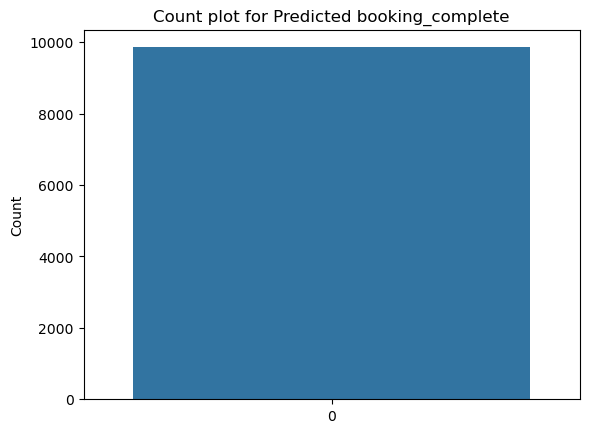

In [19]:
import seaborn as sns
sns.countplot(data=y_pred)
plt.title('Count plot for Predicted booking_complete')
plt.ylabel('Count')
plt.show()

In [14]:
# Evaluate the model

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy Score: 0.8520848128233742

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8378
           1       0.54      0.10      0.16      1479

    accuracy                           0.85      9857
   macro avg       0.70      0.54      0.54      9857
weighted avg       0.81      0.85      0.81      9857


Confusion Matrix:
[[8257  121]
 [1337  142]]


In [15]:
# Feature importance

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                  Feature  Importance
3           purchase_lead    0.193945
7                   route    0.149424
5             flight_hour    0.141490
4          length_of_stay    0.127558
8          booking_origin    0.106148
6              flight_day    0.092046
12        flight_duration    0.071276
0          num_passengers    0.048958
11  wants_in_flight_meals    0.023142
10   wants_preferred_seat    0.017486
9     wants_extra_baggage    0.014743
1           sales_channel    0.012161
2               trip_type    0.001623


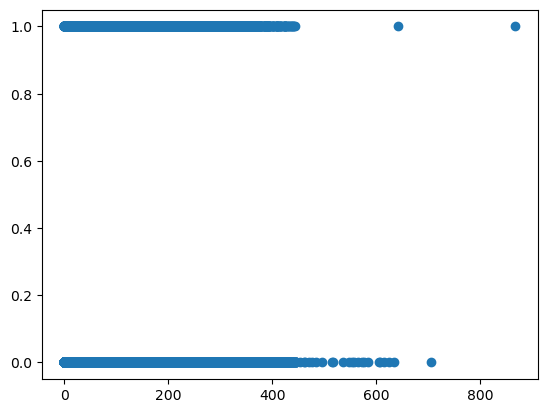

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x=data['purchase_lead'],y=data['booking_complete'])